<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH7EJ1 Agrupamiento jerárquico

__Autor__: Hector Espinos Morato [hespinos@uoc.edu](mailto:hespinos@uoc.edu)

## 1. Ejemplo sencillo para entender el funcionamiento del agrupamiento jerárquico

In [1]:
import numpy as np

Tengamos una colección de puntos, estos puntos los representamos como un array de `numpy`. 

In [2]:
LM_points = np.array([[2,2], [2,4], [4,4], [6,6], [7,8], [2,9], [8,5], [7,2], [8,7], [5,1],])

Ahora vamos a visualizar dichos puntos. 

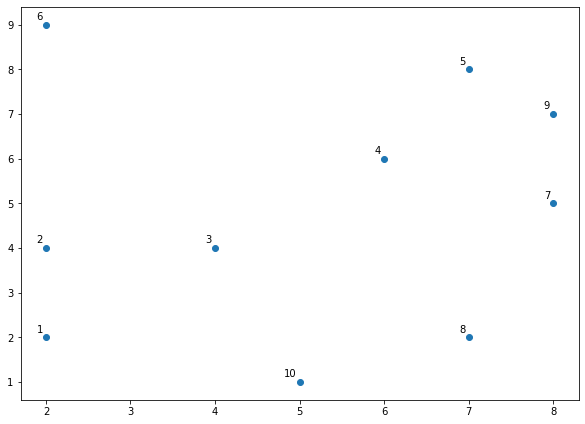

In [3]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(LM_points[:,0],LM_points[:,1], label='True Position')

for label, x, y in zip(labels, LM_points[:, 0], LM_points[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

Estos son los puntos representados: 
- Punto 1 o A: [2,2]
- Punto 2 o B: [2,4]
- Punto 3 o C: [4,4]
- Punto 4 o D: [6,6]
- Punto 5 o E: [7,8]
- Punto 6 o F: [2,9]
- Punto 7 o G: [8,5]
- Punto 8 o H: [7,2]
- Punto 9 o I: [8,7]
- Punto 10 o J: [5,1]

En este gráfíco aún no vemos muy bien que posibles clusters que se podrían formar. Para ello vamos a formar el dendograma que corresponde a estos puntos, empleando la librería `scipy`. 

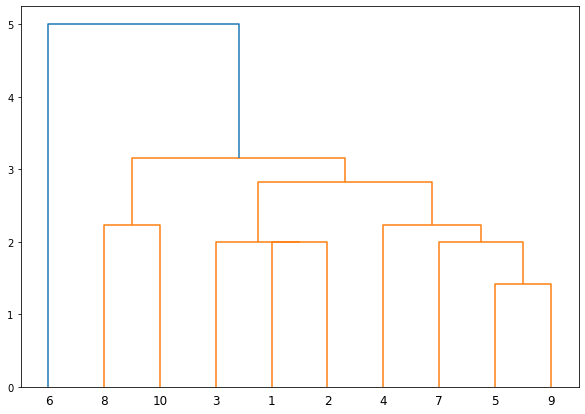

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(LM_points, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

El algoritmo empieza encontrando los dos puntos que están más cerca uno de otro, en este caso en base a la distancia euclídea. Si vemos en el primer gráfico, los puntos más cercanos son el 5 y el 9, en este caso el I y el E. El primer clúster sería por tanto el IE. Después viendo el dendograma, la siguiente iteración del algoritmo veríamos que se crean dos clúster. Al clúster IE se le uniría el punto 7, es decir el punto G, tendríamos en la segunda iteración el cluster IEG y por otra parte el clúster 3,1,2, es decir el cluster CBA, así iríamos subiendo por el dendograma. 

Al final tendríamos dos clústers (uno formado por todos los puntos menos el 6) y otro formado por solo un punto, el 6. 

## 2. Ejemplo con datos más complejos

El problema que vamos a resolver en esta sección es segmentar a los clientes en diferentes grupos según sus tendencias de compra, empleando el dataset `shopping-data`.

In [5]:
# Importamos las librerías que nos harán falta
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [7]:
customer_data = pd.read_csv('../data/shopping-data.csv')

A cotinuación, vamos a explorar un poco el dataset.

In [8]:
customer_data.shape

(200, 5)

In [9]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Vemos que nuestro _dataset_ tiene 5 columnas: 
- el código de cliente
- el género
- la edad
- los ingresos anuales 
- los gastos de los clientes. 

Veamos los resultados en el espacio de características bidimensional. Para ello tenemos que "eliminar" de alguna manera tres columnas. 

En este caso es interesante analizar las dos últimas (los ingresos anuales de las personas y lo que se gastan estas), a ver si encontramos alguna relación interesante entre ellas. 

Por lo tanto, filtramos con la función `iloc` (mirar esta función en [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)). 

In [10]:
data = customer_data.iloc[:, 3:5].values

Y creamos el dendograma como lo hemos hecho anteriormente. 

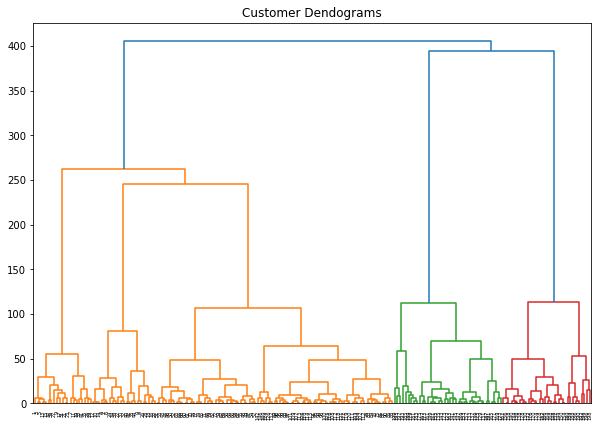

In [11]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

__Nota__: Aquí hemos utilizado el método `linkage`. Este método minimiza las distancias como parámetros, pero podríamos haberlo hecho con otro método. Es interesante mirar cómo difiere el resultado al hacerlo de diferentes maneras. 

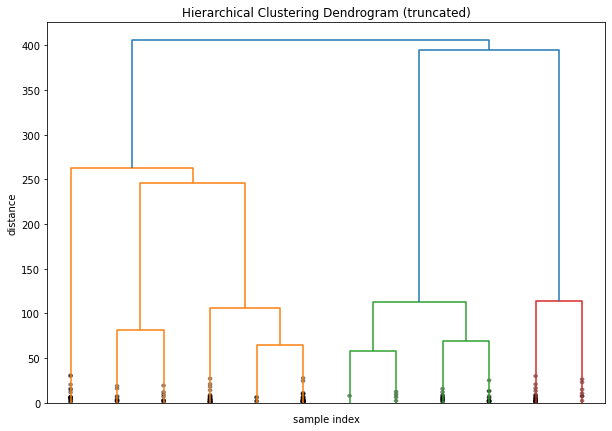

In [12]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(data, 'ward')

plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

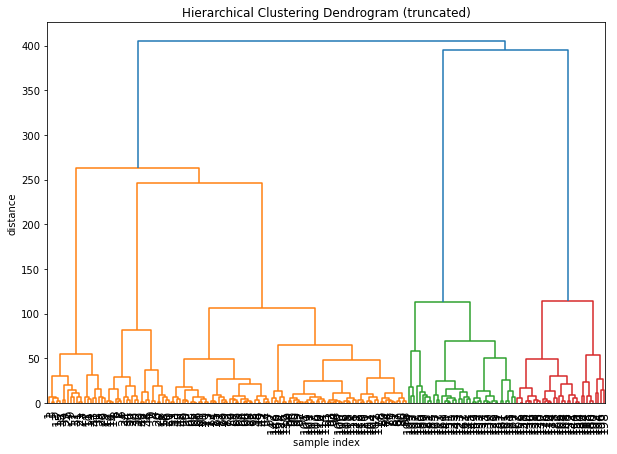

In [13]:
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='mlab',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=False,  # to get a distribution impression in truncated branches
)
plt.show()

Una vez hemos visto los diferentes dendogramas, entonces vamos a ver los clústers que tenemos del dendograma.

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

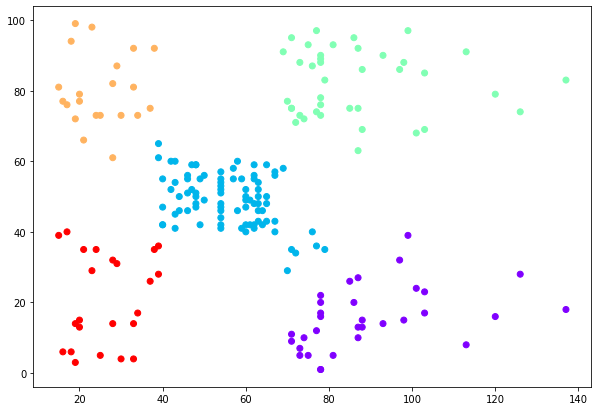

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

En el apartado anterior, lo que hemos hecho es establecer un número de clústers que nosotros hemos visto coherente, ¿por qué 5? Porque en el dendograma anterior hemos visto que con 5 ya tenemos un número de clústers que tienen bastantes puntos, por lo que en principio parece un buen candidato.

Otra cosa importante es ir jugando con los parámetros. 

por ejemplo:

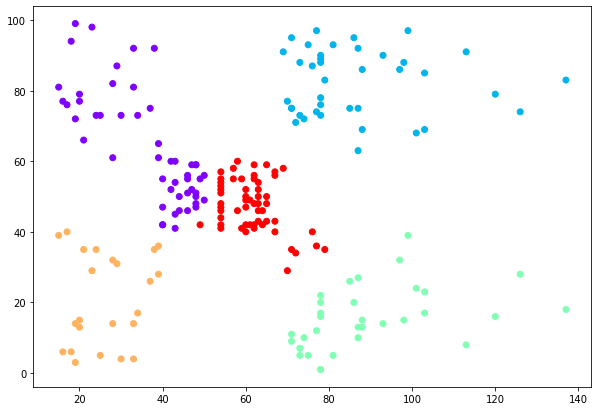

In [16]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity='manhattan', linkage='complete')
cluster.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Aquí, por ejemplo, hemos usado en vez de la distancia euclídea, la distancia Manhattan. Igual podemos hacerlo con la distancia coseno.

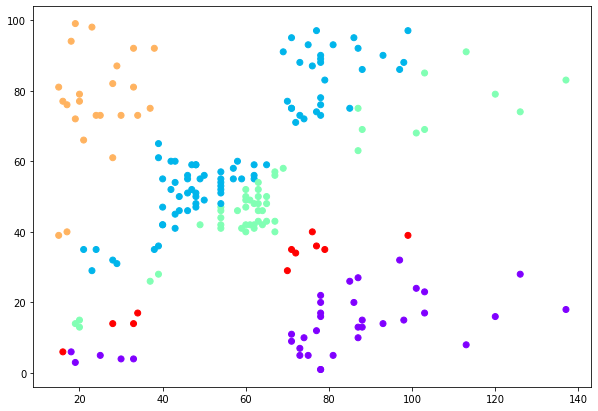

In [17]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity='cosine', linkage='complete')
cluster.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Como podemos ver, los clústers han cambiado. 

Por lo tanto, es importante la métrica que utilizemos para "linkar" los clústeres, así como el criterio usado para su linkage (agrupación).